# 0.0 IMPORTS

In [54]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import Image, display

from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 0.1 Loadind Data

In [3]:
# Dados de treinamento
df_training_feature = pd.read_csv( '../data/training_set_features.csv', low_memory=False)
df_training_labels = pd.read_csv( '../data/training_set_labels.csv', low_memory=False)

# Dados de teste
df_submission = pd.read_csv( '../data/submission_format.csv', low_memory=False)
df_test = pd.read_csv( '../data/test_set_features.csv', low_memory=False)

# Juntando as informações dos dados de treinamento
df_raw = pd.merge(df_training_feature, df_training_labels, how='left', on='respondent_id')

In [4]:
df_raw.head(5)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


# 1.0. Passo 1 - DESCRIÇÃO DOS DADOS

## 1.1. Data Dimensions

In [5]:
df1 = df_raw.copy()

In [6]:
print(f'Numero de Linhas: {df1.shape[0]}')
print(f'Numero de Colunas: {df1.shape[1]}')

Numero de Linhas: 26707
Numero de Colunas: 38


## 1.2. Data Types

In [7]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


## 1.3. Check NA

In [8]:
df1.isna().sum().to_frame(name='dtype')

,dtype
respondent_id,0
h1n1_concern,92
h1n1_knowledge,116
behavioral_antiviral_meds,71
behavioral_avoidance,208
behavioral_face_mask,19
behavioral_wash_hands,42
behavioral_large_gatherings,87
behavioral_outside_home,82
behavioral_touch_face,128


## 1.4. Fillout NA

In [9]:
df1['employment_occupation'].value_counts(dropna=False, normalize=True)

employment_occupation
NaN         0.504362
xtkaffoo    0.066574
mxkfnird    0.056502
emcorrxb    0.047553
cmhcxjea    0.046692
xgwztkwe    0.040514
hfxkjkmi    0.028682
qxajmpny    0.020519
xqwwgdyp    0.018160
kldqjyjy    0.017561
uqqtjvyb    0.016924
tfqavkke    0.014528
ukymxvdu    0.013929
vlluhbov    0.013255
oijqvulv    0.012881
ccgxvspp    0.012768
bxpfxfdn    0.012394
haliazsg    0.011083
rcertsgn    0.010334
xzmlyyjv    0.009286
dlvbwzss    0.008500
hodpvpew    0.007788
dcjcmpih    0.005542
pvmttkik    0.003669
Name: proportion, dtype: float64

In [10]:
# Variáveis de percepção/opinião --Preenchido com a mediana
df1['h1n1_concern'] = df1['h1n1_concern'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['h1n1_knowledge'] = df1['h1n1_knowledge'].apply( lambda x: 1 if math.isnan( x ) else x )
df1['opinion_h1n1_vacc_effective'] = df1['opinion_h1n1_vacc_effective'].apply( lambda x: 4 if math.isnan( x ) else x )
df1['opinion_h1n1_risk'] = df1['opinion_h1n1_risk'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_h1n1_sick_from_vacc'] = df1['opinion_h1n1_sick_from_vacc'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_seas_vacc_effective'] = df1['opinion_seas_vacc_effective'].apply( lambda x: 4 if math.isnan( x ) else x )
df1['opinion_seas_risk'] = df1['opinion_seas_risk'].apply( lambda x: 2 if math.isnan( x ) else x )
df1['opinion_seas_sick_from_vacc'] = df1['opinion_seas_sick_from_vacc'].apply( lambda x: 2 if math.isnan( x ) else x )

# Variáveis comportamentais -- Preenchido com 0 assumindo que o comportamento não foi realizado
df1['behavioral_antiviral_meds'] = df1['behavioral_antiviral_meds'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_avoidance'] = df1['behavioral_avoidance'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_face_mask'] = df1['behavioral_face_mask'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_wash_hands'] = df1['behavioral_wash_hands'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_large_gatherings'] = df1['behavioral_large_gatherings'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_outside_home'] = df1['behavioral_outside_home'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['behavioral_touch_face'] = df1['behavioral_touch_face'].apply( lambda x: 0 if math.isnan( x ) else x )

# Variáveis de saúde -- Preenchido com a moda
df1['doctor_recc_h1n1'] = df1['doctor_recc_h1n1'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['doctor_recc_seasonal'] = df1['doctor_recc_seasonal'].apply( lambda x: 0 if math.isnan( x ) else x ) 
df1['chronic_med_condition'] = df1['chronic_med_condition'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['child_under_6_months'] = df1['child_under_6_months'].apply( lambda x: 0 if math.isnan( x ) else x )
df1['health_worker'] = df1['health_worker'].apply( lambda x: 0 if math.isnan( x ) else x ) 
df1['health_insurance'] = df1['health_insurance'].apply( lambda x: -1 if math.isnan( x ) else x ) # Criado uma nova categoria para os casos "desconhecido"

# Variáveis Demográficas -- Preenchido com a moda
df1['education'] = df1['education'].apply( lambda x: 'College Graduate' if pd.isna( x ) else x )
df1['income_poverty'] = df1['income_poverty'].apply( lambda x: '<= $75,000, Above Poverty' if pd.isna( x ) else x )
df1['marital_status'] = df1['marital_status'].apply( lambda x: 'Married' if pd.isna( x ) else x )
df1['rent_or_own'] = df1['rent_or_own'].apply( lambda x: 'Own' if pd.isna( x ) else x )
df1['employment_status'] = df1['employment_status'].apply( lambda x: 'Employed' if pd.isna( x ) else x )

# Domicílio -- Preenchido com a mediana
df1['household_adults'] = df1['household_adults'].apply( lambda x: 1 if math.isnan( x ) else x )
df1['household_children'] = df1['household_children'].apply( lambda x: 0 if math.isnan( x ) else x )



In [11]:
df1.isna().sum().to_frame(name='dtype')

,dtype
respondent_id,0
h1n1_concern,0
h1n1_knowledge,0
behavioral_antiviral_meds,0
behavioral_avoidance,0
behavioral_face_mask,0
behavioral_wash_hands,0
behavioral_large_gatherings,0
behavioral_outside_home,0
behavioral_touch_face,0


## 1.5. Change Types

In [12]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,float64
h1n1_knowledge,float64
behavioral_antiviral_meds,float64
behavioral_avoidance,float64
behavioral_face_mask,float64
behavioral_wash_hands,float64
behavioral_large_gatherings,float64
behavioral_outside_home,float64
behavioral_touch_face,float64


In [13]:
# Variáveis de percepção/opinião
df1['h1n1_concern'] = df1['h1n1_concern'].astype( int )
df1['h1n1_knowledge'] = df1['h1n1_knowledge'].astype( int )
df1['opinion_h1n1_vacc_effective'] = df1['opinion_h1n1_vacc_effective'].astype( int )
df1['opinion_h1n1_risk'] = df1['opinion_h1n1_risk'].astype( int )
df1['opinion_h1n1_sick_from_vacc'] = df1['opinion_h1n1_sick_from_vacc'].astype( int )
df1['opinion_seas_vacc_effective'] = df1['opinion_seas_vacc_effective'].astype( int )
df1['opinion_seas_risk'] = df1['opinion_seas_risk'].astype( int )
df1['opinion_seas_sick_from_vacc'] = df1['opinion_seas_sick_from_vacc'].astype( int )

# Variáveis comportamentais
df1['behavioral_antiviral_meds'] = df1['behavioral_antiviral_meds'].astype( int )
df1['behavioral_avoidance'] = df1['behavioral_avoidance'].astype( int )
df1['behavioral_face_mask'] = df1['behavioral_face_mask'].astype( int )
df1['behavioral_wash_hands'] = df1['behavioral_wash_hands'].astype( int )
df1['behavioral_large_gatherings'] = df1['behavioral_large_gatherings'].astype( int )
df1['behavioral_outside_home'] = df1['behavioral_outside_home'].astype( int )
df1['behavioral_touch_face'] = df1['behavioral_touch_face'].astype( int )

# Variáveis de saúde -- Preenchido com a moda
df1['doctor_recc_h1n1'] = df1['doctor_recc_h1n1'].astype( int )
df1['doctor_recc_seasonal'] = df1['doctor_recc_seasonal'].astype( int ) 
df1['chronic_med_condition'] = df1['chronic_med_condition'].astype( int )
df1['child_under_6_months'] = df1['child_under_6_months'].astype( int )
df1['health_worker'] = df1['health_worker'].astype( int ) 
df1['health_insurance'] = df1['health_insurance'].astype( int )

# Domicílio -- Preenchido com a mediana
df1['household_adults'] = df1['household_adults'].astype( int )
df1['household_children'] = df1['household_children'].astype( int )

In [14]:
df1.dtypes.to_frame(name='dtype')

,dtype
respondent_id,int64
h1n1_concern,int64
h1n1_knowledge,int64
behavioral_antiviral_meds,int64
behavioral_avoidance,int64
behavioral_face_mask,int64
behavioral_wash_hands,int64
behavioral_large_gatherings,int64
behavioral_outside_home,int64
behavioral_touch_face,int64


## 1.6. Descriptive Statistical

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.6.1. Numerical Attributes

In [16]:
df1.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.719961,0.068933,0.824316,0.357472,0.336279,0.674018,0.202494,0.303067,0.272962,0.080054,0.108548,0.015839,3.852810,2.337589,2.352380,4.025536,2.705321,2.115737,0.887558,0.529599,0.212454,0.465608
std,7709.791156,0.909016,0.617047,0.215273,0.449026,0.253345,0.380558,0.479264,0.472444,0.468749,0.401866,0.459592,0.445490,0.271382,0.311077,0.966841,1.000195,1.276825,1.353339,1.077131,1.375216,1.319585,0.749980,0.925264,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### 1.6.2. Categorical Attributes

In [17]:
df1.describe(include=['object'])

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,26707,26707,26707,26707,26707,26707,26707,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,11504,21222,15858,17200,14963,20778,15023,4297,11645,2468,1778


In [18]:
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [19]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      22
employment_occupation    24
dtype: int64

# 2.0. FEATURA ENGENEERING

In [20]:
df2 = df1.copy()

## 2.1. Mapa Mental de Hipoteses

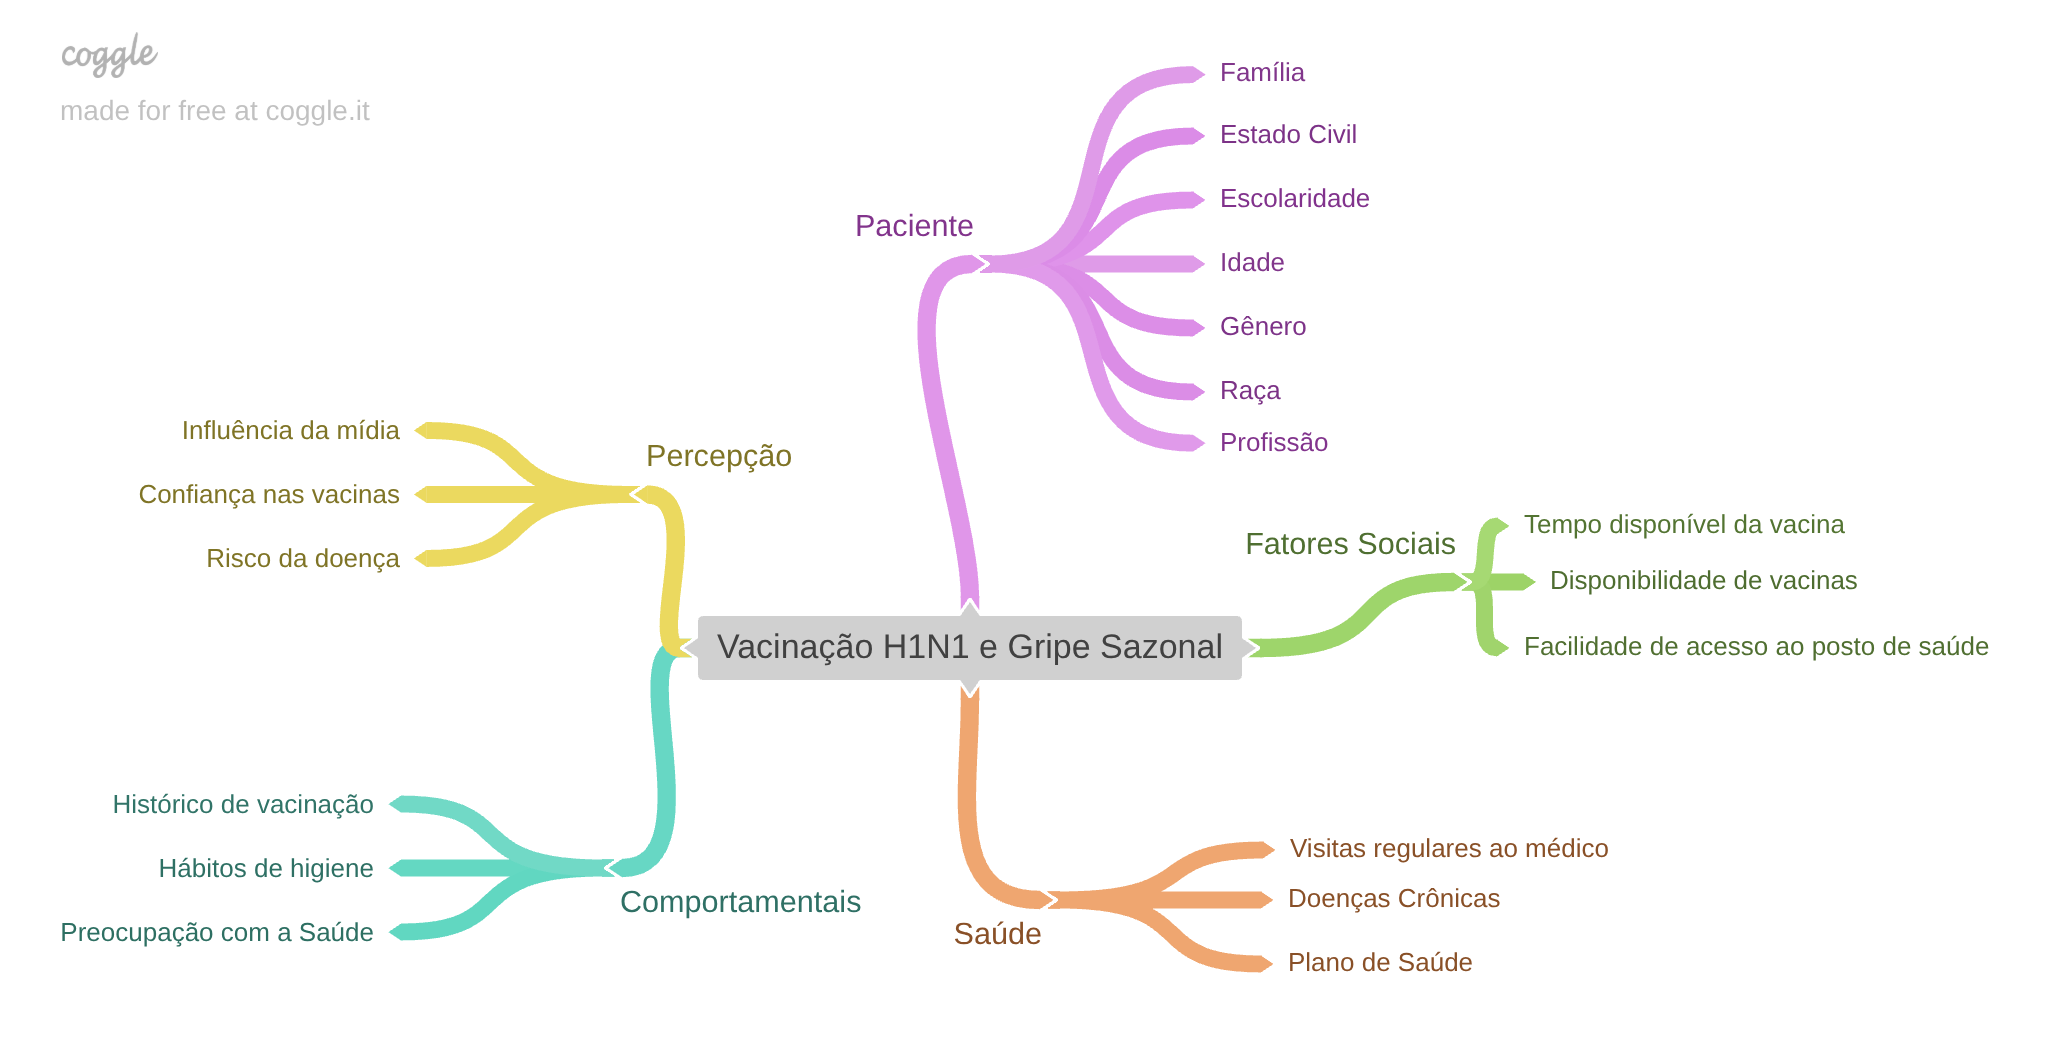

In [21]:
display(Image( filename='../img/mapa_mental.png'))

## 2.2. Criação das Hipóteses

### 2.2.1 Hipóteses Paciente

1. Pessoas mais velhas têm maior taxa de vacinação por maior risco percebido.
2. Pacientes com maior escolaridade são mais propensos a se vacinar.
3. Pessoas casadas tendem a se vacinar mais.
4. Mulheres se vacinam mais do que homens.
5. Pacientes com renda mais alta se vacina mais do que pacientes com renda mais baixa.
6. Pessoas não brancas apresentam menor taxa de vacinação.
7. Pacientes com filhos pequenos tem maior probabilidade de vacinação para proteger a família.
8. Moradores de áreas urbanas vacinam-se mais do que os de áreas rurais.

### 2.2.2 Hipóteses Percepções e Comportamento de Saúde

1. Pessoas que percebem alto risco de contágio vacinam-se mais.
2. Indivíduos que confiam no sistema de saúde têm maior taxa de vacinação.
3. Pessoas com histórico de doenças respiratórias buscam mais a vacina.
4. Quem recebeu vacina em anos anteriores tende a repetir o comportamento.
5. Indivíduos que frequentam consultas médicas regularmente vacinam-se mais.
6. Quem tem medo de efeitos colaterais evita a vacinação.
7. O nível de conhecimento sobre a gripe H1N1 está diretamente relacionado à probabilidade de vacinação.
8. Indivíduos com amigos ou familiares vacinados tendem a seguir o mesmo comportamento.

### 2.2.3 Hipóteses Situação de Trabalho e Acesso

1. Pessoas empregadas formalmente têm mais acesso a campanhas corporativas de vacinação.
2. Indivíduos com seguro saúde vacinam-se mais facilmente.
3. Pessoas que possuem moradia própria tendem a apresentar maior estabilidade e maior adesão vacinal.
4. A proximidade de locais de vacinação aumenta a probabilidade de imunização.
5. Profissionais da área de saúde são mais vacinados por exigência profissional.
6. Pessoas que trabalham remotamente podem sentir menor urgência de se vacinar.

### 2.2.4 Hipóteses Influências Sociais e Culturais

1. Influência familiar aumenta a probabilidade de vacinação.
2. A pressão social pode motivar indivíduos a se vacinarem para “não ficar de fora”.
3. Em comunidades com alta taxa de vacinação, o comportamento tende a se repetir.
4. Amigos vacinados servem como exemplo e estímulo.
5. Estigma ou desinformação cultural pode diminuir a adesão.
6. Campanhas públicas locais influenciam positivamente a decisão.
7. Experiências negativas com vacinas anteriores reduzem a confiança.

## 2.3. Feature Engineering

In [22]:
# nível de prevenção geral
df2['health_behaviors_score'] = df2['behavioral_antiviral_meds'] + df2['behavioral_avoidance'] + df2['behavioral_face_mask'] + df2['behavioral_wash_hands'] + df2['behavioral_large_gatherings'] + df2['behavioral_outside_home'] + df2['behavioral_touch_face']

# recomendação médica para qualquer vacina
df2['doctor_recc_any'] = ( (df2['doctor_recc_h1n1'] == 1 ) | (df2['doctor_recc_seasonal'] == 1 )).astype(int)

# score de confiança nas vacinas
cols_opinion = [
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc'
]

cols_neg = ['opinion_h1n1_sick_from_vacc', 'opinion_seas_sick_from_vacc']

for col in cols_neg:
    df2[col] = 6 - df2[col] # inverte o sentido

df2['opinion_vacc_positive'] = df2[cols_opinion].mean(axis=1)

# Percepção de risco
cols_risk = ['opinion_h1n1_risk', 'opinion_seas_risk']
df2['risk_awareness_score'] = df2[cols_risk].mean(axis=1)

# crianças no domicílio
df2['has_children'] = (df2['household_children'] > 0).astype(int)

# tamanho da familia
df2['family_size'] = df2['household_children'] + df2['household_adults']

# Casado com filhos
df2['is_married_parent'] = ((df2['marital_status'] == 'Married') & (df2['has_children'] == 1)).astype(int)

# education
education_map = {
    '< 12 Years': 0,
    '12 Years': 1,
    'Some College': 2,
    'College Graduate': 3
}

df2['education_level_num'] = df2['education'].map(education_map)

# income_poverty
income_map = {
    'Below Poverty': 0, 
    '<= $75,000, Above Poverty': 1,
    '> $75,000': 2
}

df2['income_category'] = df2['income_poverty'].map(income_map)

# Possui seguro saúde ou recomendação medica
df2['has_health_access'] = ( (df2['health_insurance'] == 1) | (df2['doctor_recc_any'] == 1) ).astype(int)

# Grupo de risco
df2['chronic_risk_group'] = ( (df2['chronic_med_condition'] == 1) | (df2['child_under_6_months'] == 1) ).astype(int)

# Eficácia Vacina X Risco percebido
df2['opinion_gap'] = df2['opinion_h1n1_vacc_effective'] - df2['opinion_h1n1_risk']

# Crença na eficácia da vacina
df2['trust_in_vaccines'] = ( df2['opinion_h1n1_vacc_effective'] > df2['opinion_h1n1_sick_from_vacc']).astype(int)

In [23]:
df2[['health_behaviors_score', 'doctor_recc_any', 'opinion_vacc_positive', 'risk_awareness_score',
    'has_children', 'family_size', 'is_married_parent', 'education_level_num', 'income_category', 'has_health_access', 
    'chronic_risk_group', 'opinion_gap', 'trust_in_vaccines']].sample(5).T

,2569,3103,19865,9457,14876
health_behaviors_score,0.000000,3.0,4.000000,3.000000,3.0
doctor_recc_any,0.000000,1.0,1.000000,1.000000,1.0
opinion_vacc_positive,3.666667,3.5,3.333333,3.666667,3.5
risk_awareness_score,2.000000,2.0,2.000000,2.000000,4.0
has_children,0.000000,0.0,0.000000,0.000000,0.0
family_size,1.000000,0.0,0.000000,1.000000,1.0
is_married_parent,0.000000,0.0,0.000000,0.000000,0.0
education_level_num,3.000000,3.0,1.000000,3.000000,3.0
income_category,2.000000,1.0,1.000000,2.000000,1.0
has_health_access,1.000000,1.0,1.000000,1.000000,1.0


# 3.0 FILTRAGEM DE VARIÁVEIS

In [24]:
df3 = df2.copy()

In [25]:
df3.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine,health_behaviors_score,doctor_recc_any,opinion_vacc_positive,risk_awareness_score,has_children,family_size,is_married_parent,education_level_num,income_category,has_health_access,chronic_risk_group,opinion_gap,trust_in_vaccines
0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,3,1,4,2,1,4,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,NaN,NaN,0,0,2,0,2.500000,1.0,0,0,0,0,0,1,0,2,0
1,1,3,2,0,1,0,1,0,1,1,0,0,0,0,0,1,5,4,2,4,2,2,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe,0,1,4,0,3.166667,3.0,0,0,0,1,0,1,0,1,1
2,2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,-1,3,1,5,4,1,4,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo,0,0,1,0,3.000000,1.0,0,2,0,3,1,0,1,2,0
3,3,1,1,0,1,0,1,1,0,0,0,1,1,0,0,-1,3,3,1,5,4,5,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,NaN,NaN,0,1,3,1,3.500000,3.5,0,0,0,1,0,1,1,0,1
4,4,2,1,0,1,0,1,1,0,1,0,0,0,0,0,-1,3,3,4,3,1,2,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb,0,0,4,0,2.666667,2.0,0,1,0,2,1,0,0,0,0


## 3.1. Seleção das colunas

In [26]:
cols_drop = ['respondent_id', 'education', 'income_poverty', 'employment_status', 'hhs_geo_region', 'census_msa',
             'employment_industry', 'employment_occupation']

df3 = df3.drop( cols_drop, axis=1 )

# 4.0. ANALISE EXPLORATORIA DOS DADOS

In [27]:
df4 = df3.copy()

## 4.1. Analise Univariada

### 4.1.1. Response Variable

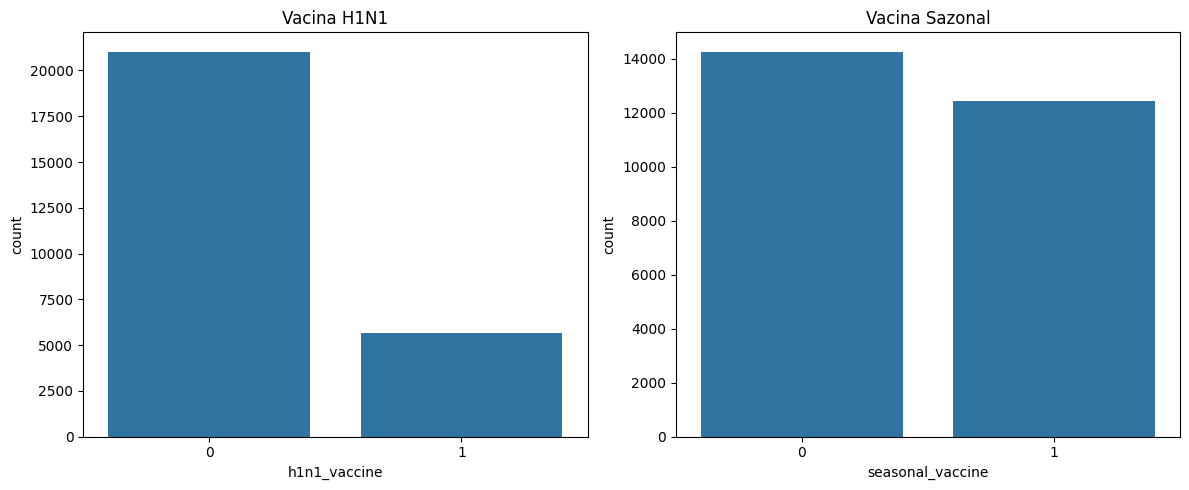

In [28]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='h1n1_vaccine', data=df4)
plt.title('Vacina H1N1')

plt.subplot(1, 2, 2)
sns.countplot(x='seasonal_vaccine', data=df4)
plt.title('Vacina Sazonal')

plt.tight_layout()
plt.show()

### 4.1.2. Numerical Variable

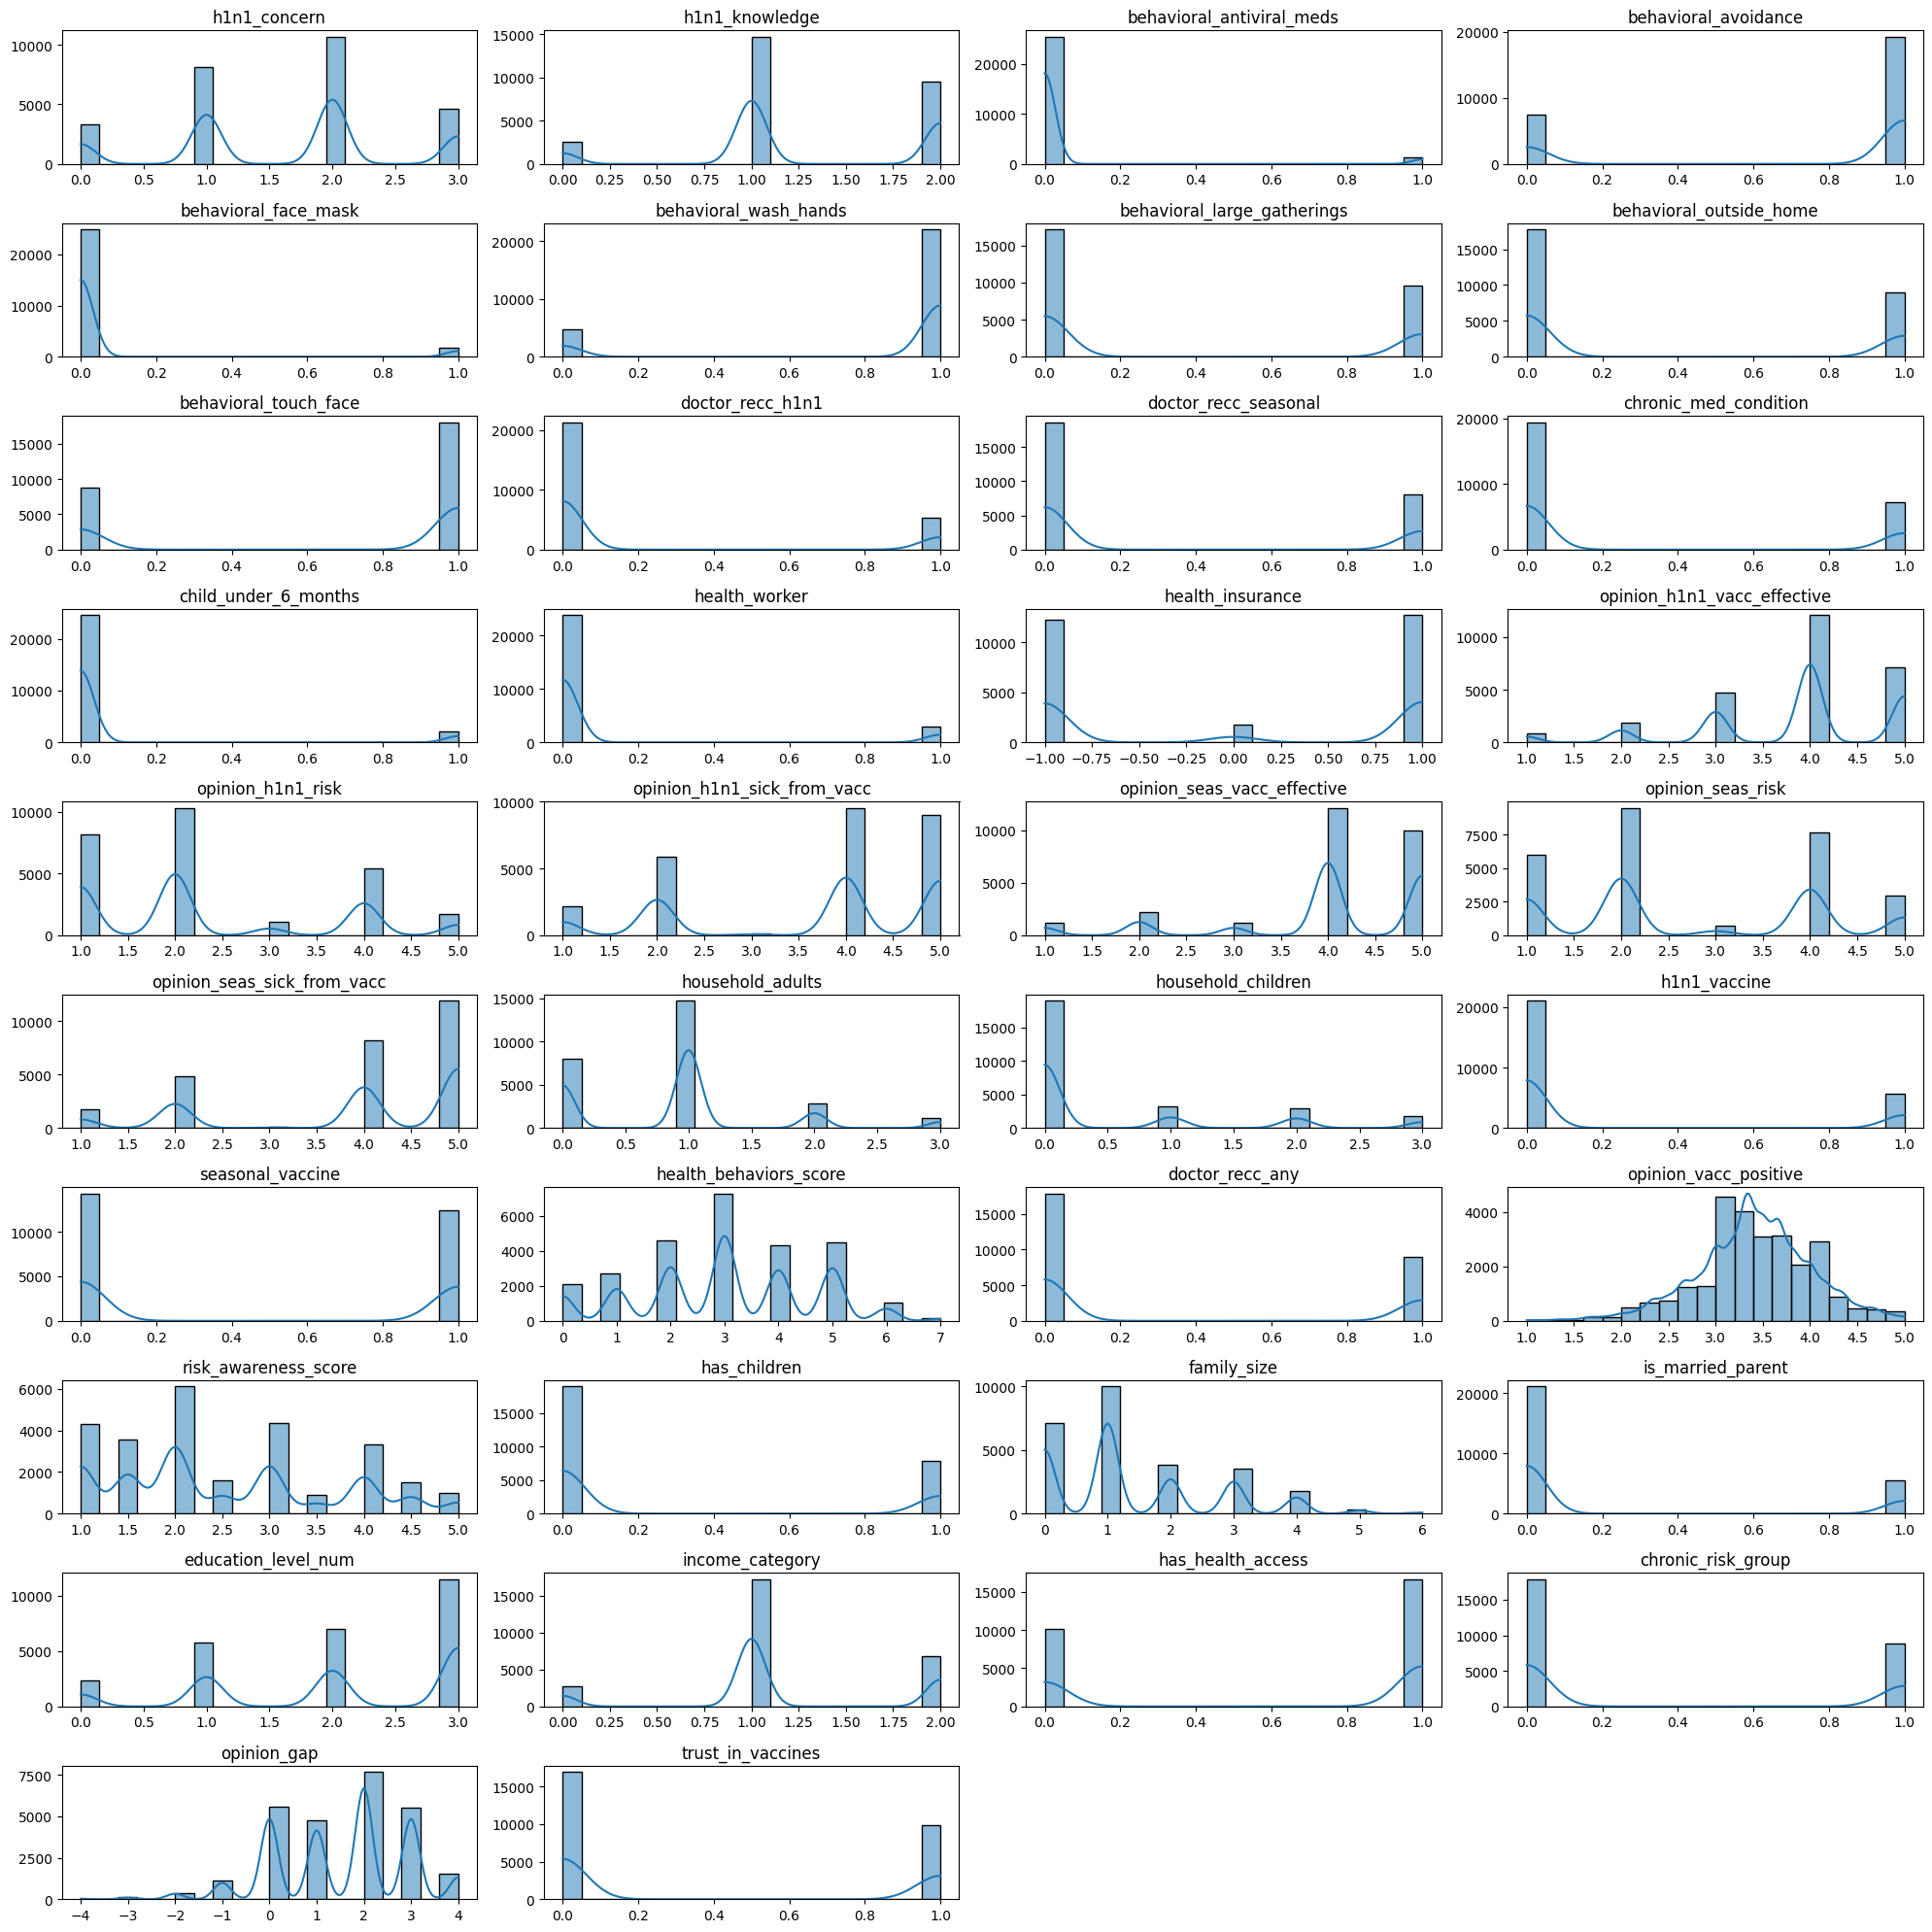

In [29]:
# Seleciona apenas as variáveis numéricas
numeric_cols = df4.select_dtypes(include=['int64', 'float64']).columns

# Define o tamanho da grade de subplots
n_cols = 4
n_rows = int(len(numeric_cols) / n_cols) + 1

plt.figure(figsize=(20, 20))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df4[col], kde=True, bins=20)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### 4.1.3. Categorical Variable

In [30]:
cat_cols = df4.select_dtypes(include=['object']).columns
cat_cols

Index(['age_group', 'race', 'sex', 'marital_status', 'rent_or_own'], dtype='object')

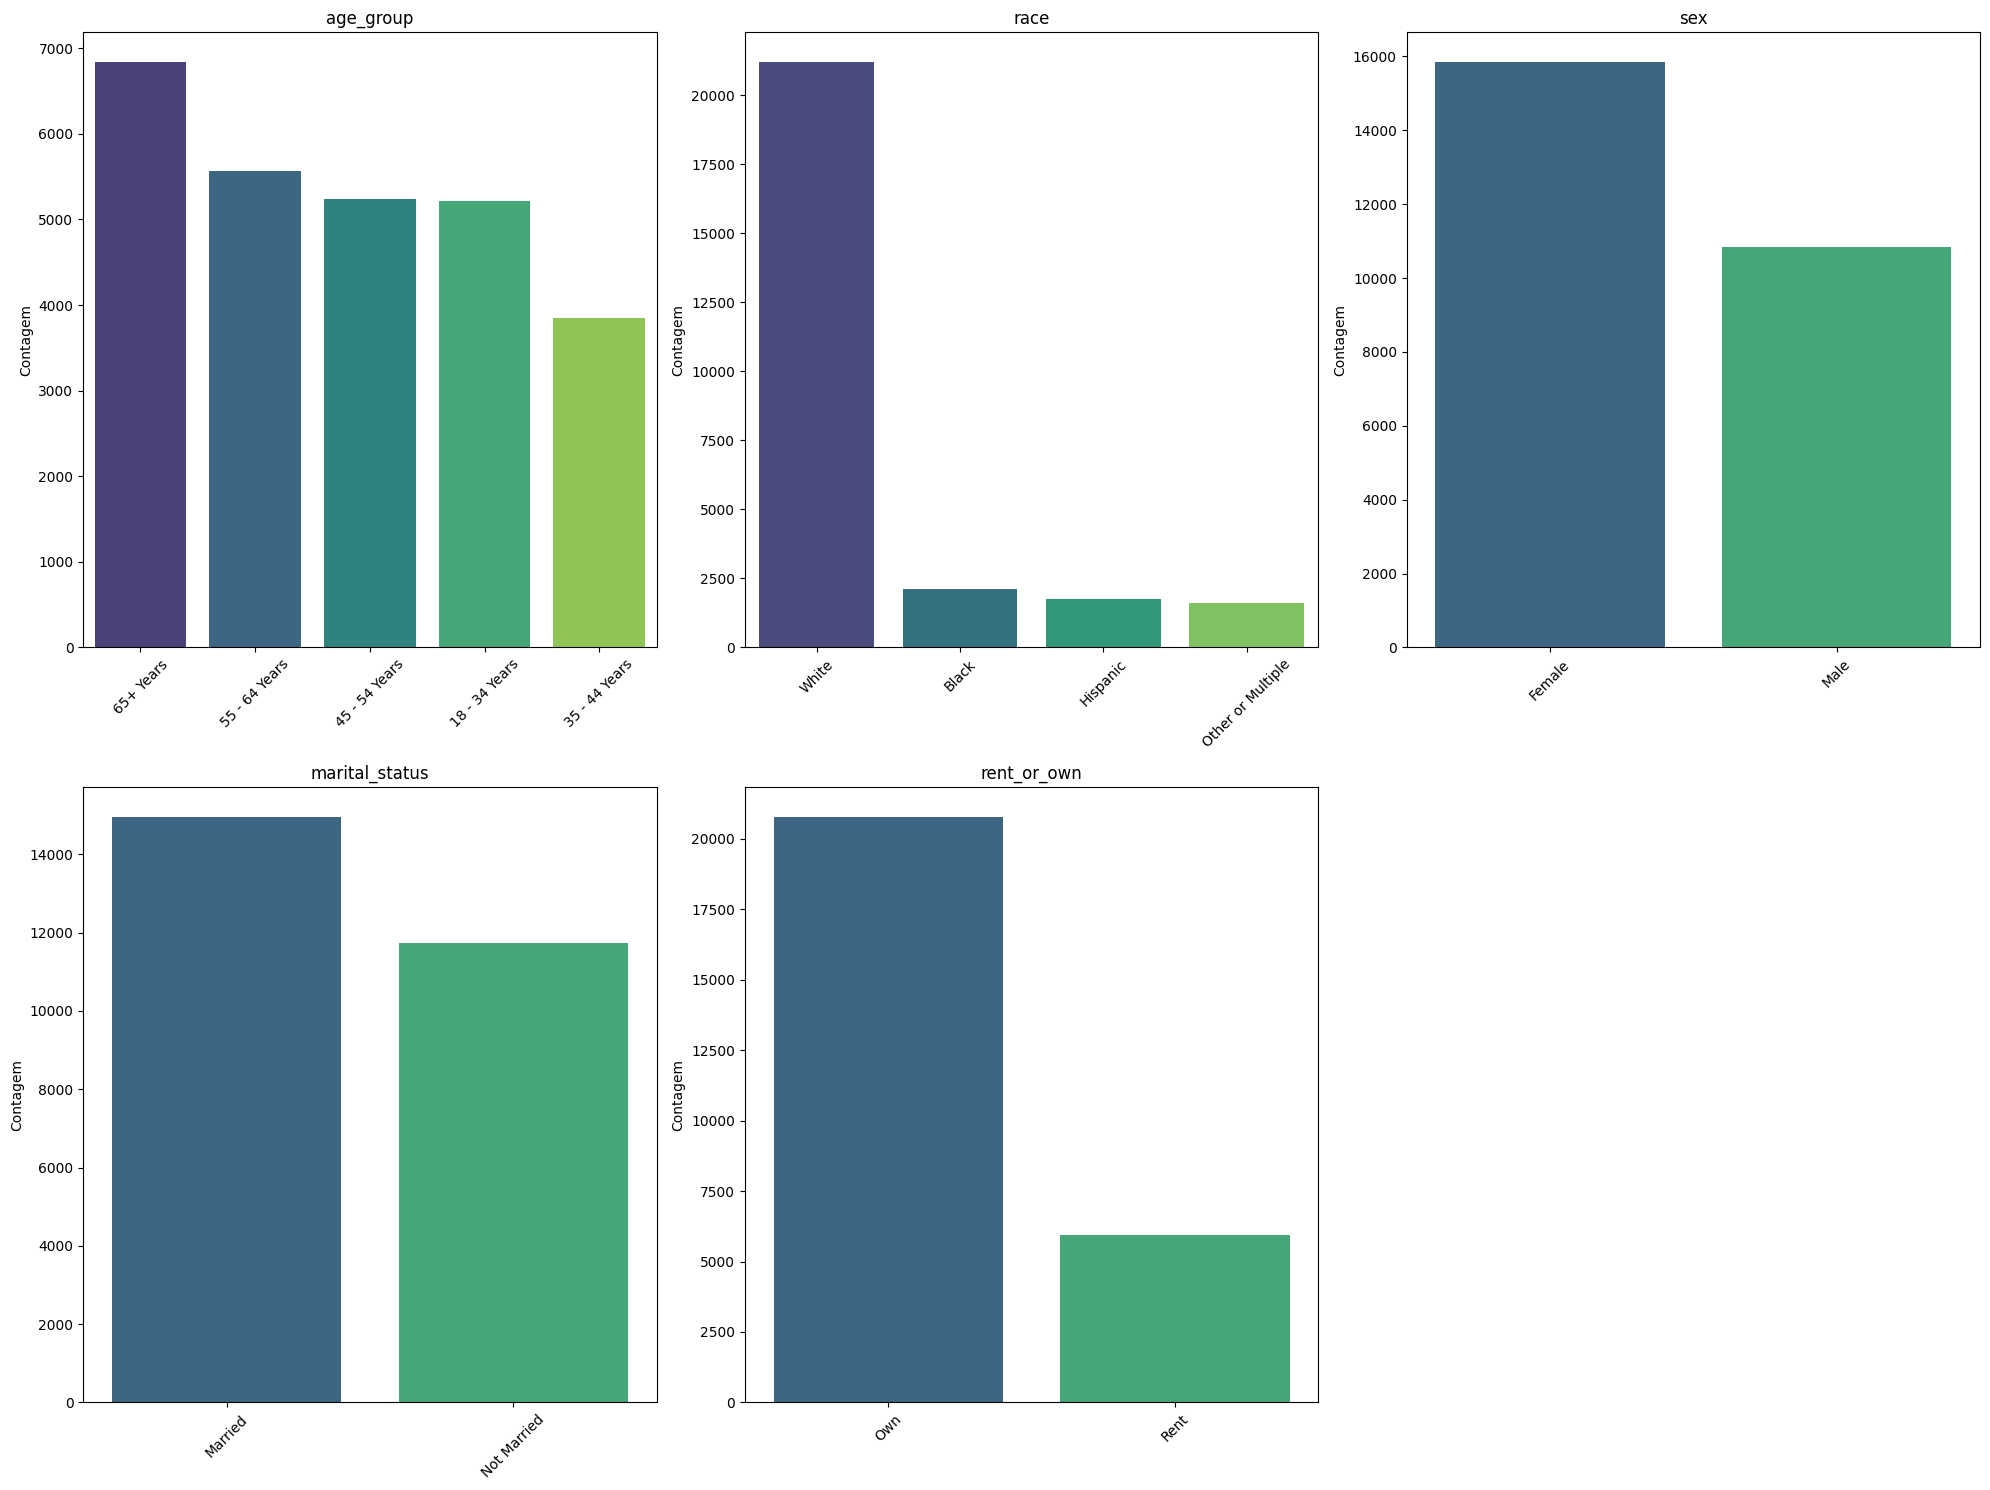

In [31]:
n_cols = 3
n_rows = int(len(cat_cols) / n_cols) + 1

plt.figure(figsize=(20, 15))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    order = df4[col].value_counts().index
    sns.countplot(data=df4, x=col, order=order, palette='viridis')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


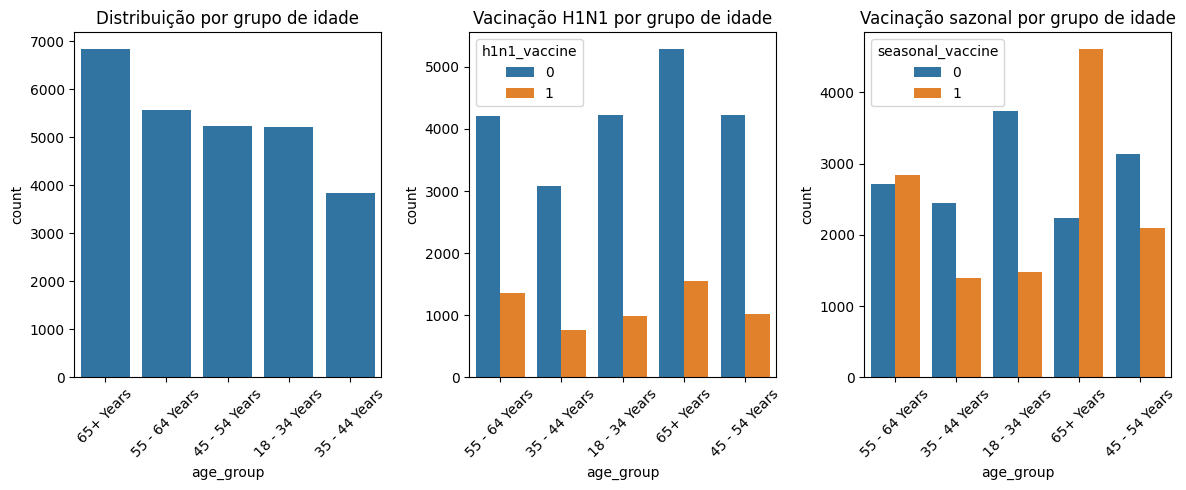

In [32]:
# age_group
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='age_group', order=df1['age_group'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição por grupo de idade')


plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='age_group', hue='h1n1_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação H1N1 por grupo de idade')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='age_group', hue='seasonal_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação sazonal por grupo de idade')

plt.tight_layout()
plt.show()

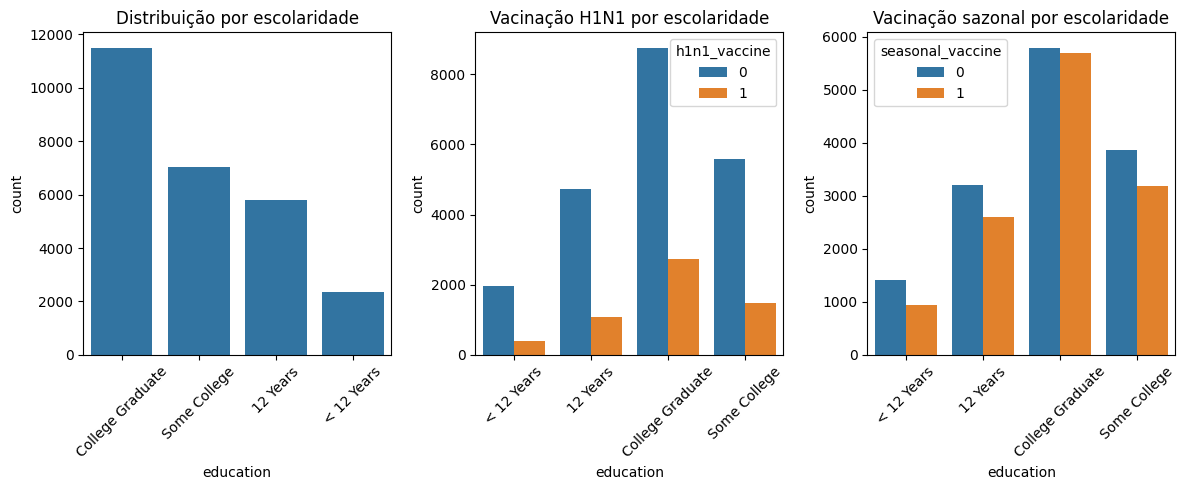

In [33]:
# education
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df1, x='education', order=df1['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribuição por escolaridade')


plt.subplot(1, 3, 2)
sns.countplot(data=df1, x='education', hue='h1n1_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação H1N1 por escolaridade')

plt.subplot(1, 3, 3)
sns.countplot(data=df1, x='education', hue='seasonal_vaccine')
plt.xticks(rotation=45)
plt.title('Vacinação sazonal por escolaridade')

plt.tight_layout()
plt.show()

## 4.2. Analise Bivariada

**H1 - Pessoas mais velhas têm maior taxa de vacinação por maior risco percebido.**

**VERDADEIRA** - Pessoas mais velhas se vacinam mais

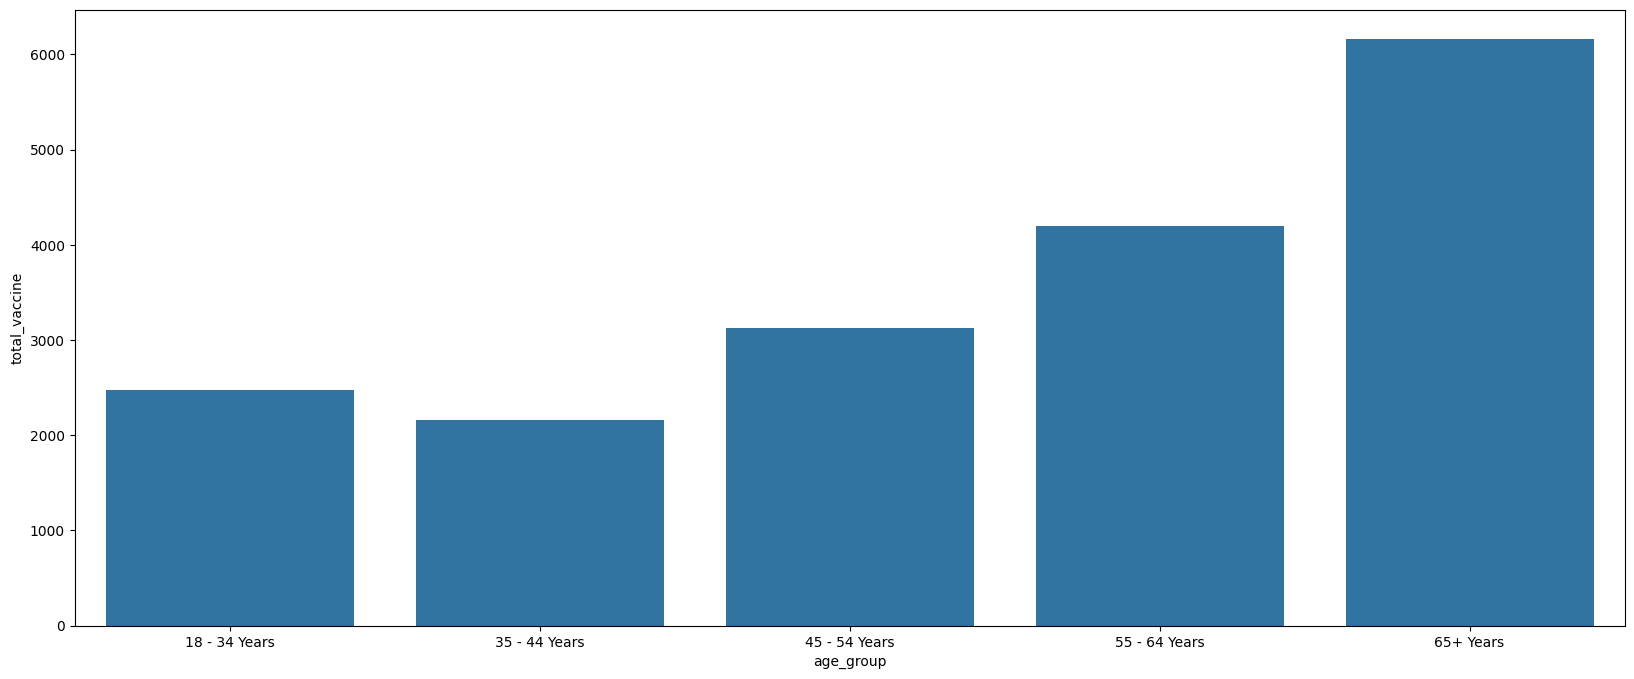

In [34]:
aux1 = (df4[['age_group', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'age_group', as_index=False )
                                                             .sum()
                                                             .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                            + x['seasonal_vaccine'] ))
aux1

plt.figure( figsize=(20,8))
sns.barplot( x='age_group', y='total_vaccine', data=aux1);

**H2 - Pessoas com maior escolaridade são mais propensos a se vacinar.**

**VERDADEIRA** Pessoas com maior escolaridade se vacinam mais

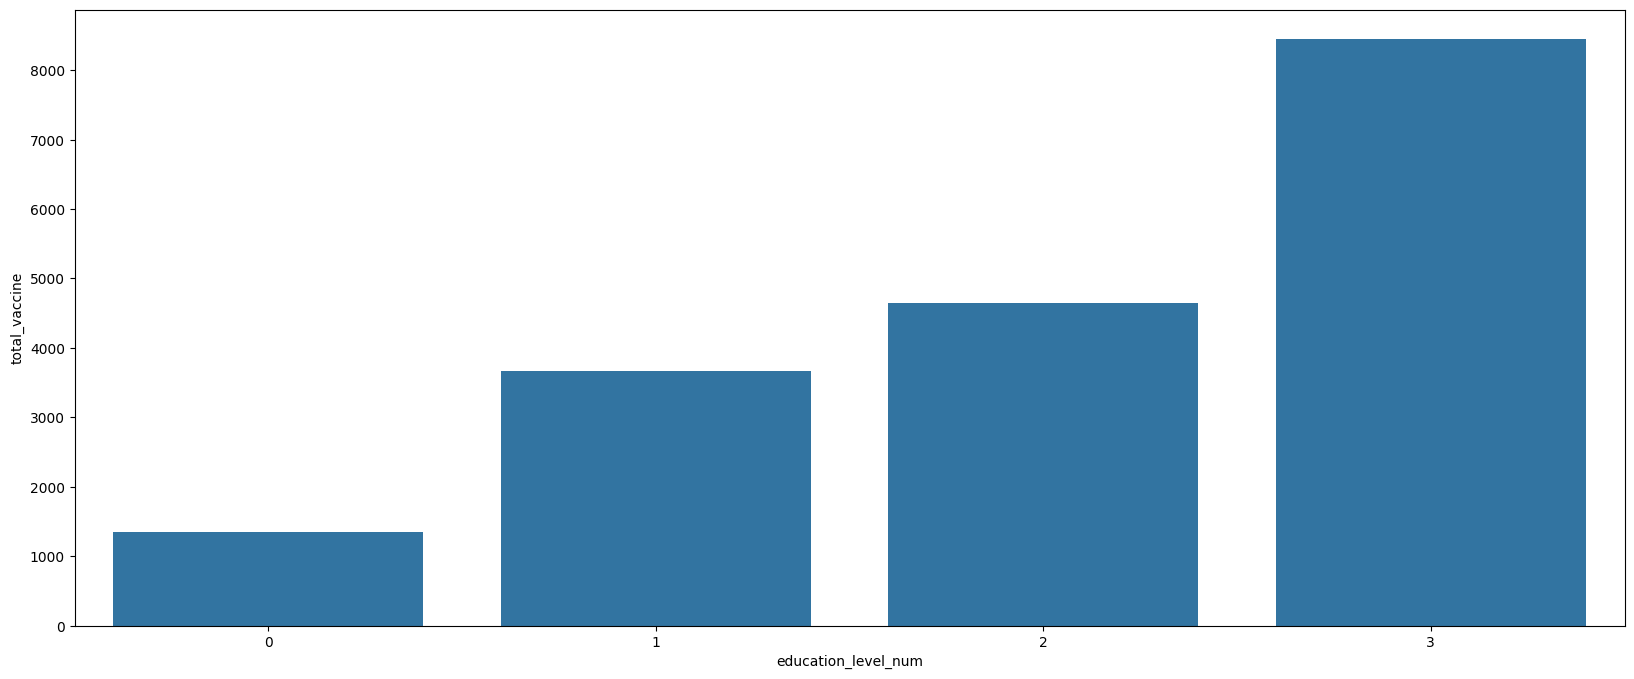

In [35]:
aux1 = ( df4[['education_level_num', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'education_level_num' )
                                                                         .sum()
                                                                         .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                            + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='education_level_num', y='total_vaccine', data=aux1);

**H3 - Pessoas casadas tendem a se vacinar mais.**

**VERDADEIRA** - Casados se vacinam mais 

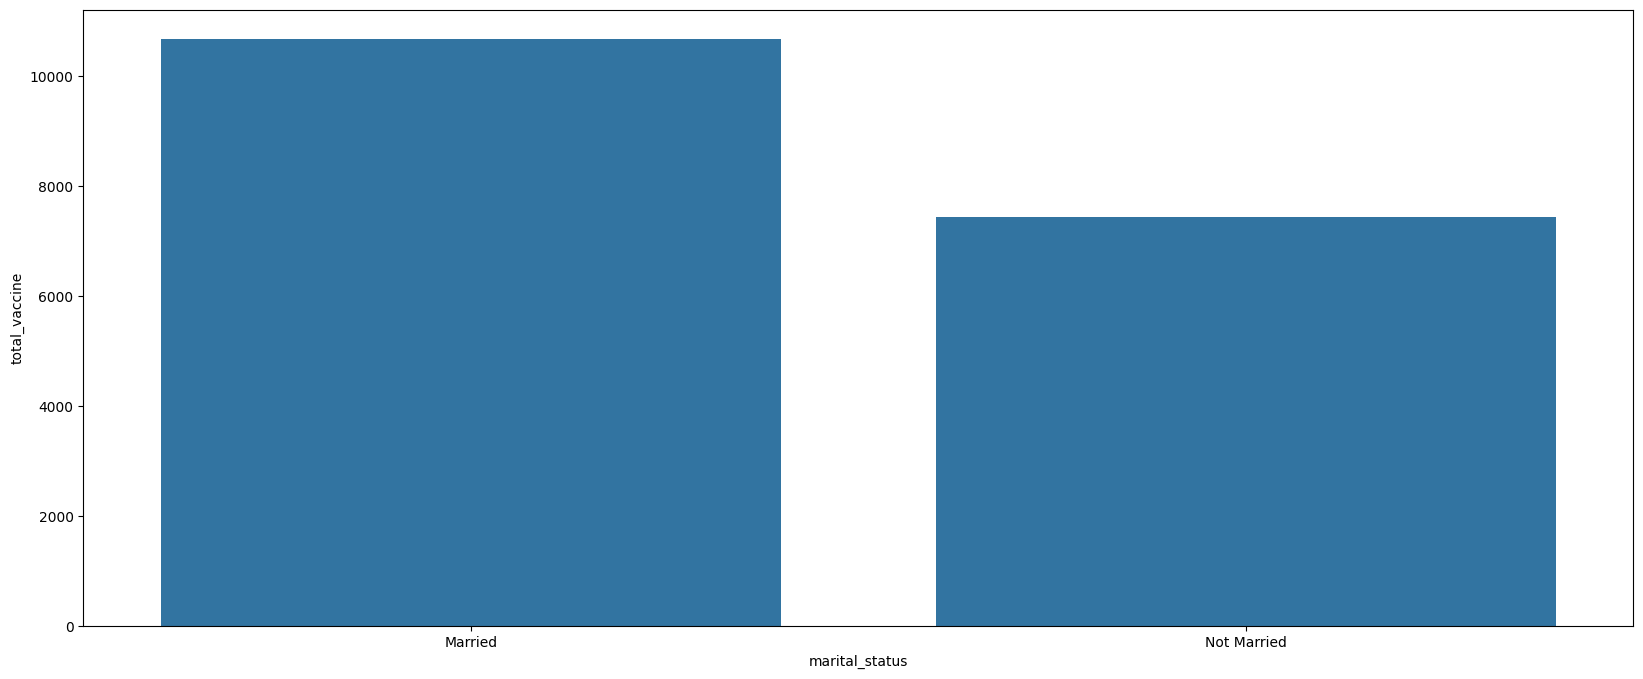

In [36]:
aux1 = (df4[['marital_status', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'marital_status' )
                                                                   .sum()
                                                                   .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                                  + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='marital_status', y='total_vaccine', data=aux1);

**H4 - Mulheres se vacinam mais do que homens.**

**VERDADEIRO**

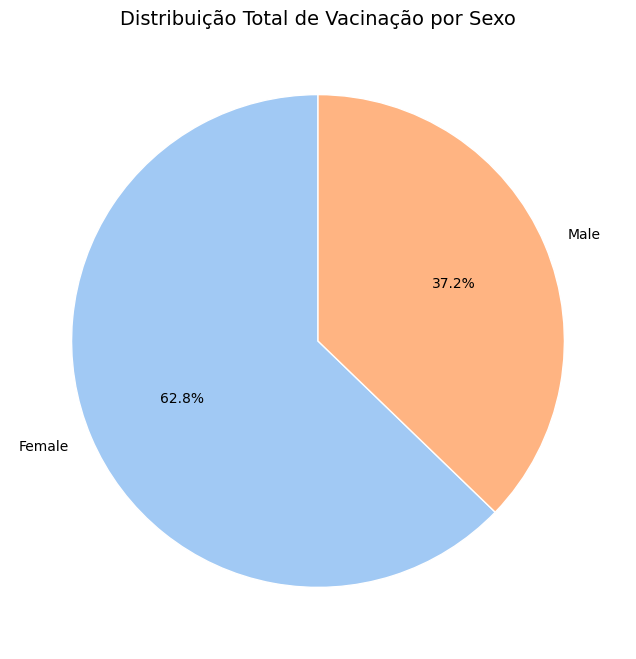

In [37]:
aux1 = ( df4[['sex', 'h1n1_vaccine', 'seasonal_vaccine']].groupby('sex', as_index=False)
                                                         .sum() )
aux1['total_vaccine'] = aux1['h1n1_vaccine'] + aux1['seasonal_vaccine']

# Criando o gráfico de pizza
colors = sns.color_palette('pastel')[0:len(aux1)]

plt.figure(figsize=(8, 8))
plt.pie(
    aux1['total_vaccine'],
    labels=aux1['sex'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Distribuição Total de Vacinação por Sexo', fontsize=14)
plt.show()


**H5 - Pacientes com renda mais alta se vacina mais do que pacientes com renda mais baixa.**

**FALSA**

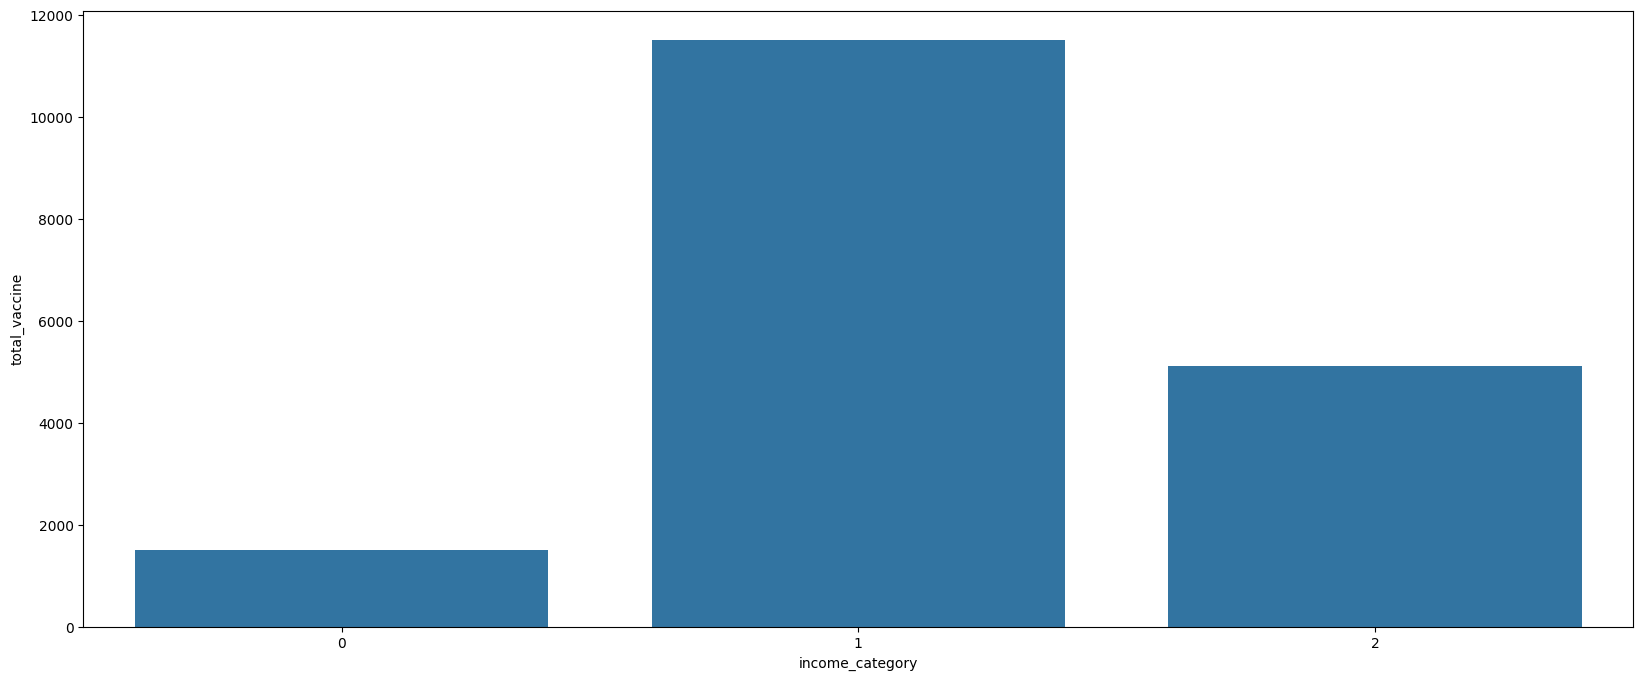

In [38]:
aux1 = (df4[['income_category', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'income_category' )
                                                                    .sum()
                                                                    .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                                   + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='income_category', y='total_vaccine', data=aux1);

**H6 - Pessoas não brancas apresentam menor taxa de vacinação.**

**VERDADEIRO**

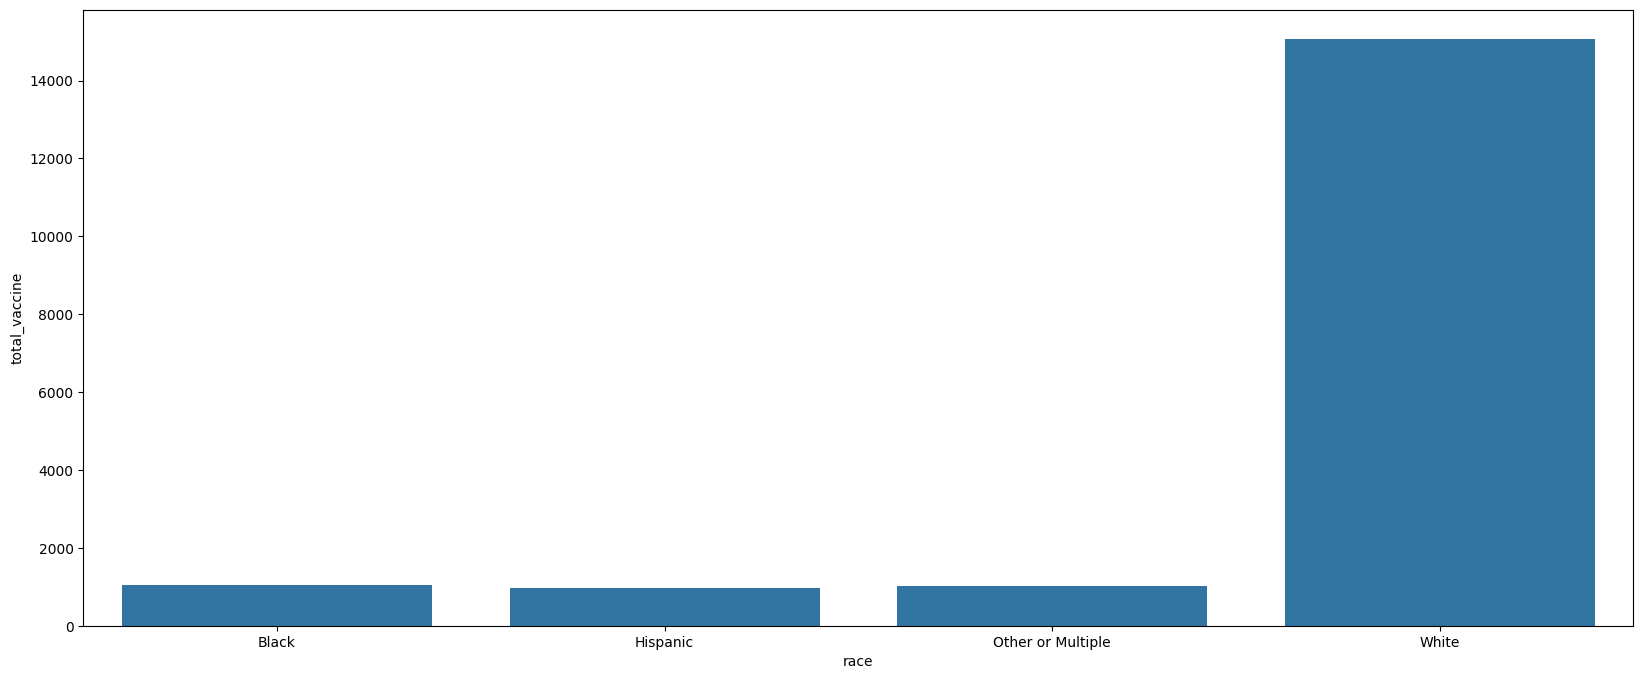

In [39]:
aux1 = (df4[['race', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'race' )
                                                         .sum()
                                                         .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                        + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='race', y='total_vaccine', data=aux1);

**H7 - Pacientes com filhos pequenos tem maior probabilidade de vacinação para proteger a família.**

**FALSO**

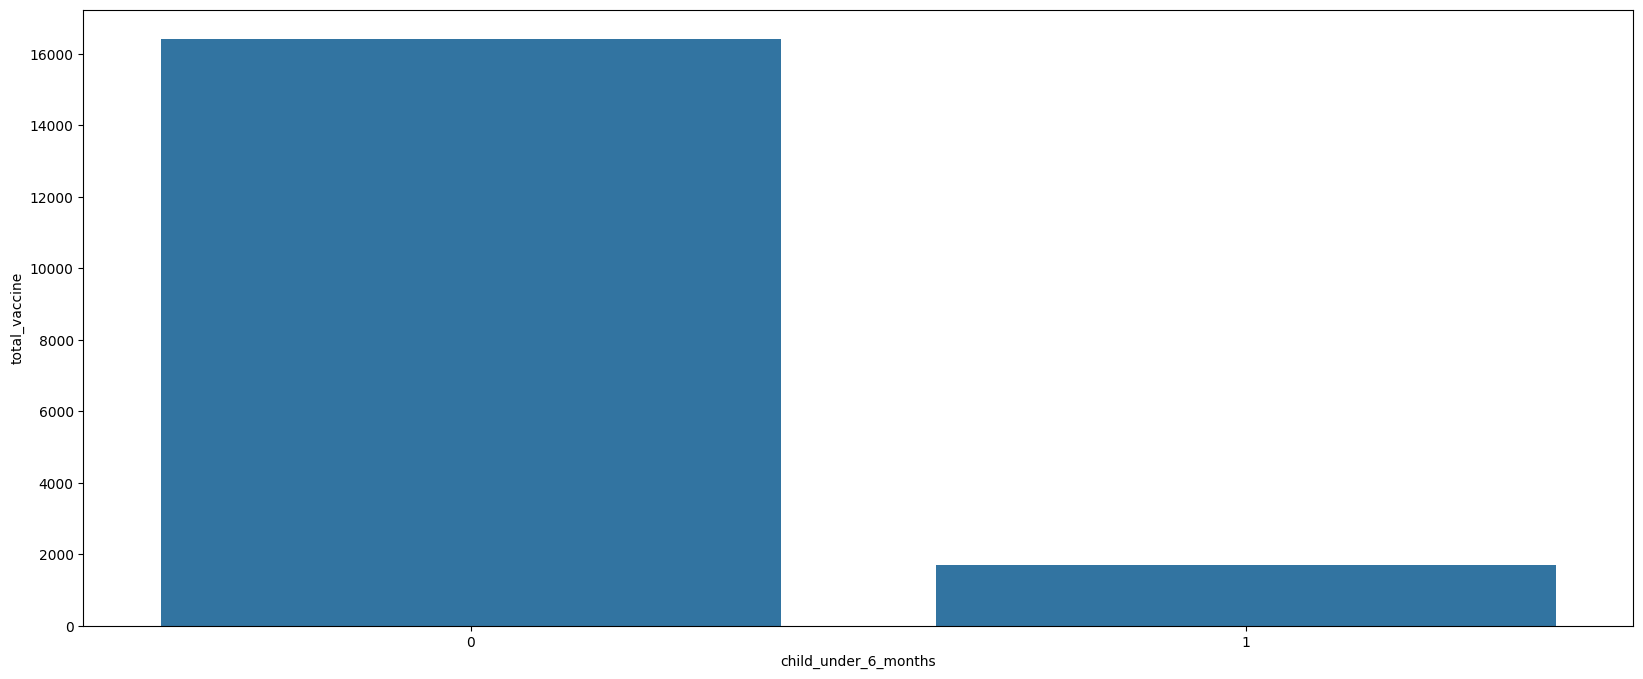

In [40]:
aux1 = (df4[['child_under_6_months', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'child_under_6_months' )
                                                                         .sum()
                                                                         .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                                        + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='child_under_6_months', y='total_vaccine', data=aux1);

**H8 - 1. Pessoas que percebem alto risco de contágio vacinam-se mais.**

**VERDADEIRO**

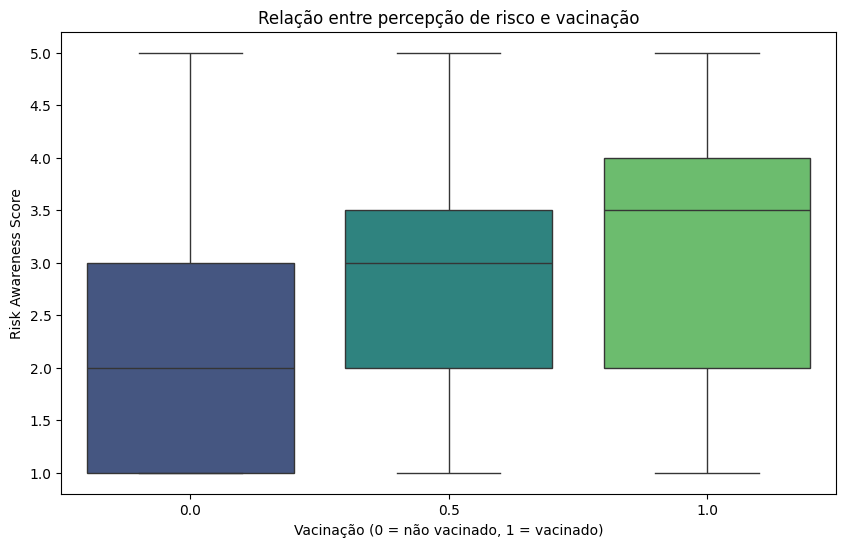

In [41]:
aux = (
    df4[['risk_awareness_score', 'h1n1_vaccine', 'seasonal_vaccine']]
    .assign(total_vaccine=lambda x: (x['h1n1_vaccine'] + x['seasonal_vaccine']) / 2)
)

plt.figure(figsize=(10,6))
sns.boxplot(data=aux, x='total_vaccine', y='risk_awareness_score', palette='viridis')
plt.title('Relação entre percepção de risco e vacinação')
plt.xlabel('Vacinação (0 = não vacinado, 1 = vacinado)')
plt.ylabel('Risk Awareness Score')
plt.show()


**H9 - Pessoas em grupos de risco (por condição crônica ou filhos pequenos) buscam mais a vacinação**

**FALSO**

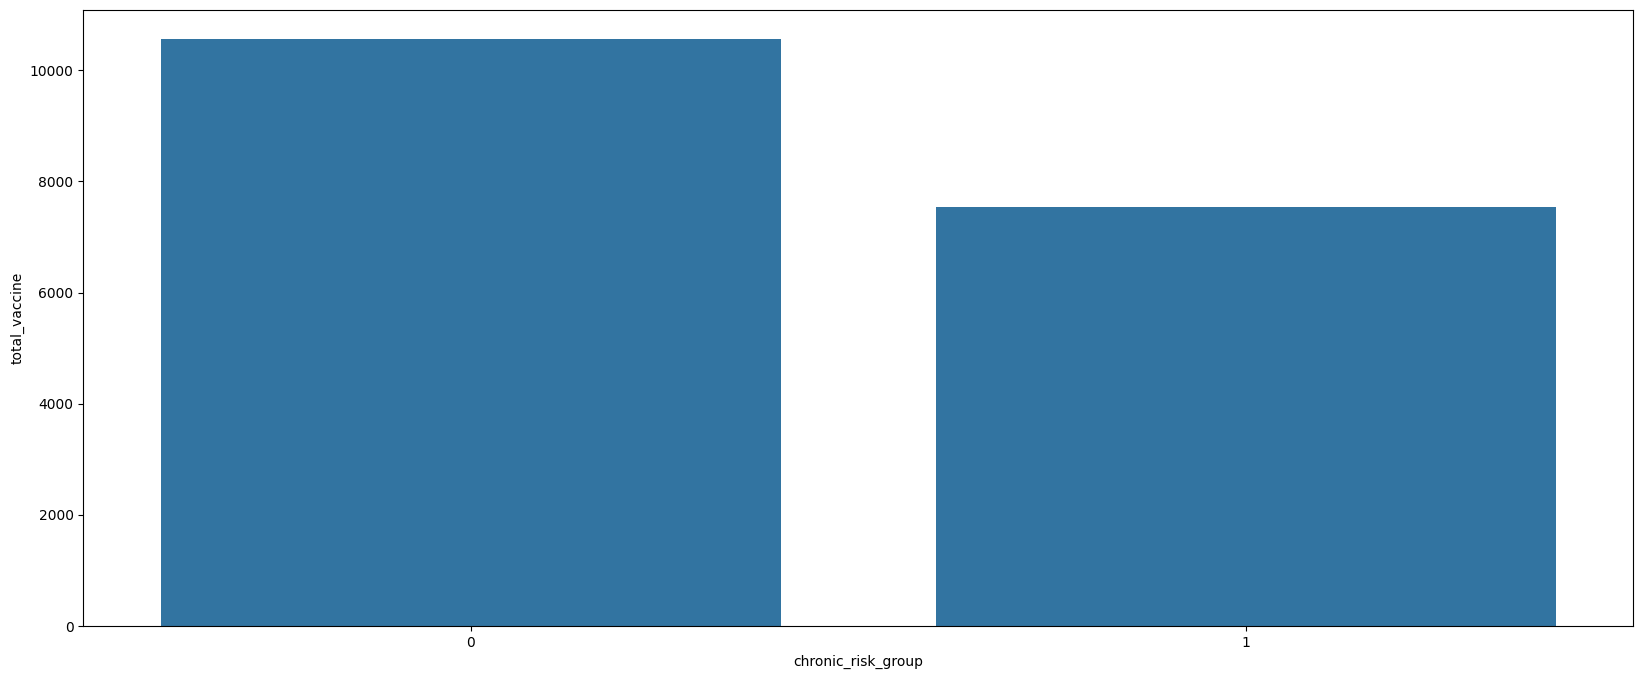

In [42]:
aux1 = (df4[['chronic_risk_group', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'chronic_risk_group' )
                                                                       .sum()
                                                                       .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                                      + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='chronic_risk_group', y='total_vaccine', data=aux1);

**H10 - Profissionais da área de saúde são mais vacinados por exigência profissional.**

**FALSO**

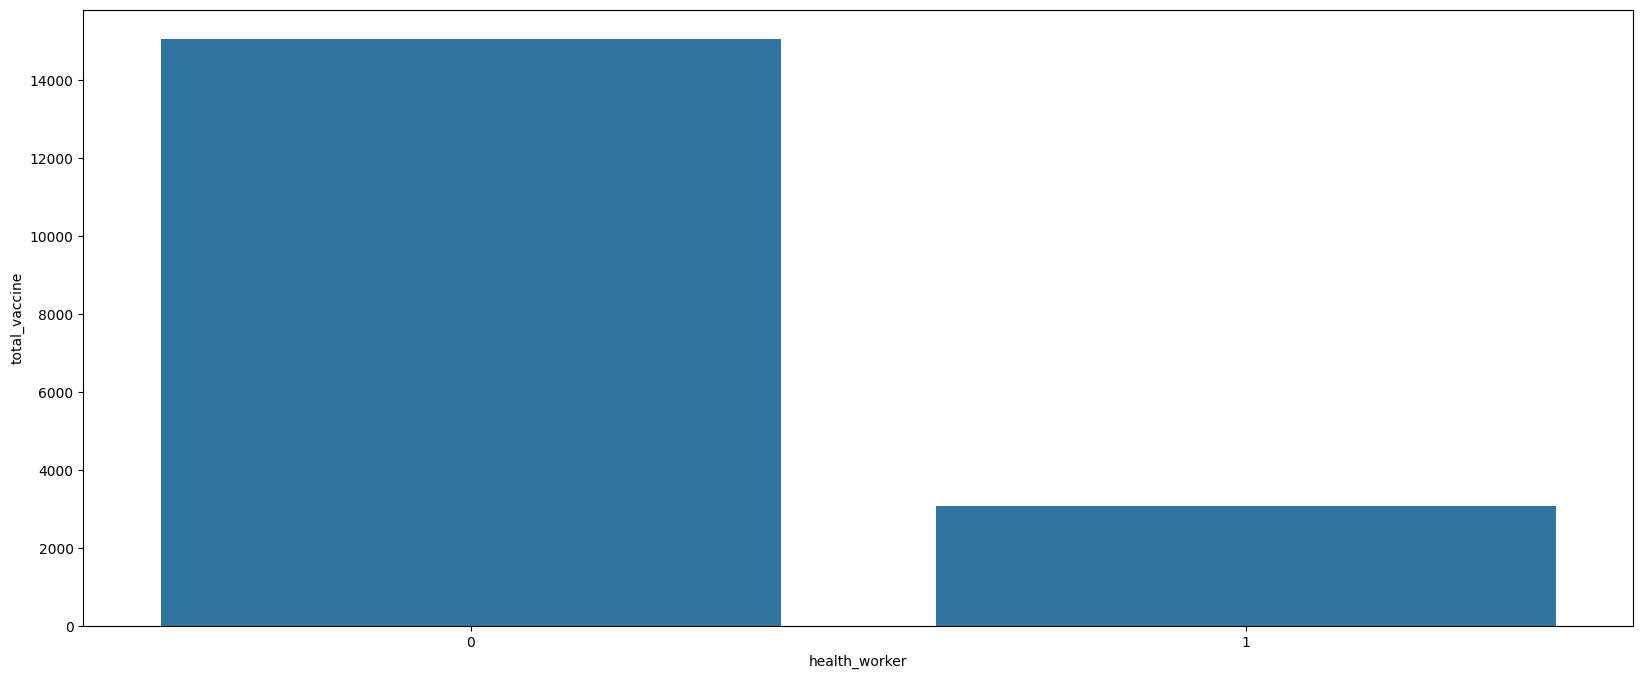

In [43]:
aux1 = (df4[['health_worker', 'h1n1_vaccine', 'seasonal_vaccine']].groupby( 'health_worker' )
                                                                   .sum()
                                                                   .assign( total_vaccine=lambda x: x['h1n1_vaccine']
                                                                                                      + x['seasonal_vaccine'] ))

plt.figure( figsize=(20,8))
sns.barplot( x='health_worker', y='total_vaccine', data=aux1);

## 4.3. Analise Multivariada

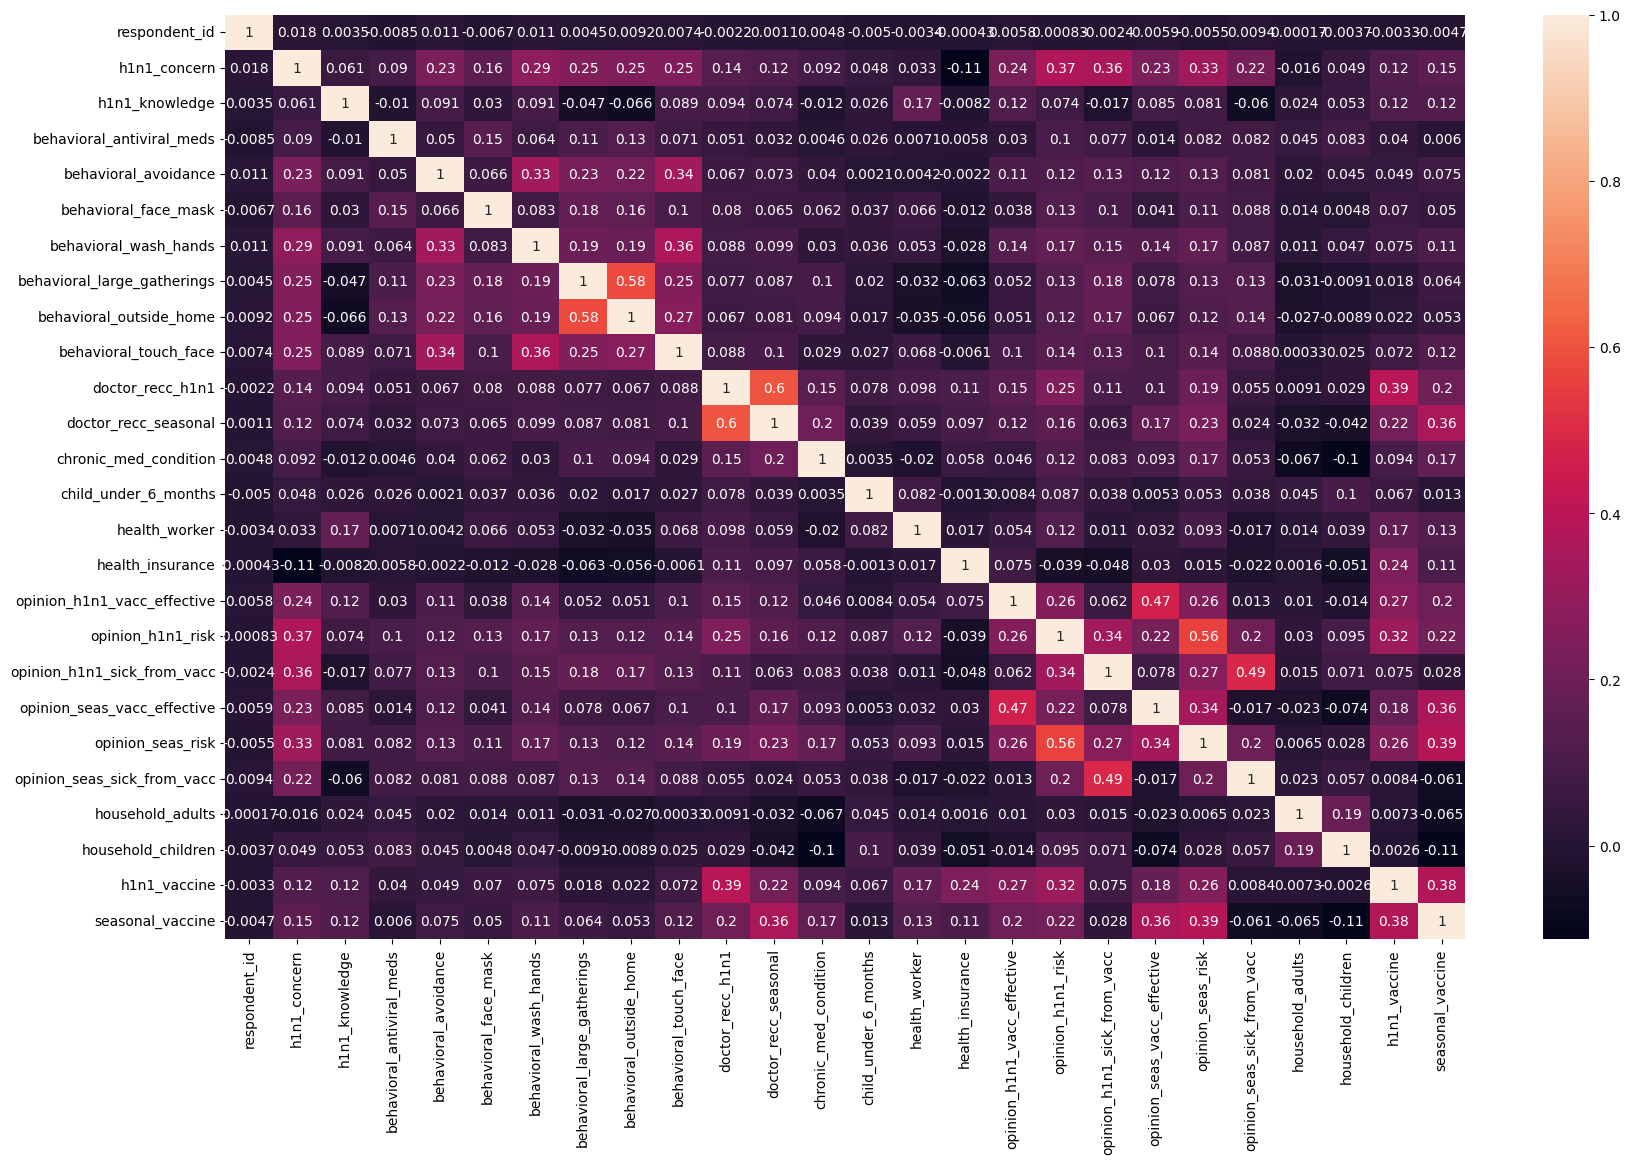

In [44]:
correlation = num_attributes.corr( method='pearson' )
plt.figure(figsize=(20, 12))
sns.heatmap( correlation, annot=True);

# 5.0. PREPARAÇÃO DOS DADOS

In [45]:
df5 = df4.copy()

## 5.1. Normalização

In [51]:
scaler = StandardScaler()
df5['opinion_vacc_positive'] = scaler.fit_transform(df5[['opinion_vacc_positive']])

## 5.2. Rescaling

In [55]:
mm = MinMaxScaler()
df5[['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
     'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
     'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'health_behaviors_score',
     'risk_awareness_score', 'family_size', 'education_level_num', 'opinion_gap']] = mm.fit_transform(df5[['h1n1_concern', 'h1n1_knowledge', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
                                                                                                           'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 
                                                                                                           'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'health_behaviors_score',
                                                                                                           'risk_awareness_score', 'family_size', 'education_level_num', 'opinion_gap']])

## 5.3. Transformação

### 5.3.1. Encoding

In [58]:
# age_group, race, sex, marital_status, rent_or_own - One Hot Encoding
df5 = pd.get_dummies( df5, columns=['age_group', 'race', 'sex', 'marital_status', 'rent_or_own'], drop_first=True)

In [59]:
df5.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine,health_behaviors_score,doctor_recc_any,opinion_vacc_positive,risk_awareness_score,has_children,family_size,is_married_parent,education_level_num,income_category,has_health_access,chronic_risk_group,opinion_gap,trust_in_vaccines,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Hispanic,race_Other or Multiple,race_White,sex_Male,marital_status_Not Married,rent_or_own_Rent
0,0.333333,0.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0.5,0.00,0.75,0.25,0.00,0.75,0.000000,0.0,0,0,0.285714,0,-1.508603,0.000,0,0.000000,0,0.000000,0,1,0,0.750,0,False,False,True,False,False,False,True,False,True,False
1,1.000000,1.0,0,1,0,1,0,1,1,0,0,0,0,0,1,1.0,0.75,0.25,0.75,0.25,0.25,0.000000,0.0,0,1,0.571429,0,-0.402009,0.500,0,0.000000,0,0.333333,0,1,0,0.625,1,True,False,False,False,False,False,True,True,True,True
2,0.333333,0.5,0,1,0,0,0,0,0,0,0,1,0,0,-1,0.5,0.00,1.00,0.75,0.00,0.75,0.666667,0.0,0,0,0.142857,0,-0.678658,0.000,0,0.333333,0,1.000000,1,0,1,0.750,0,False,False,False,False,False,False,True,True,True,False
3,0.333333,0.5,0,1,0,1,1,0,0,0,1,1,0,0,-1,0.5,0.50,0.00,1.00,0.75,1.00,0.000000,0.0,0,1,0.428571,1,0.151288,0.625,0,0.000000,0,0.333333,0,1,1,0.500,1,False,False,False,True,False,False,True,False,True,True
4,0.666667,0.5,0,1,0,1,1,0,1,0,0,0,0,0,-1,0.5,0.50,0.75,0.50,0.00,0.25,0.333333,0.0,0,0,0.571429,0,-1.231955,0.250,0,0.166667,0,0.666667,1,0,0,0.500,0,False,True,False,False,False,False,True,False,False,False
